In [ ]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

# Import specific components from TensorFlow and Keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Define the URL for the dataset and download it using TensorFlow's utility function
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 25s 0us/step


In [ ]:
# Convert the data directory path to a pathlib object
#Pathlib is a native Python library for handling files
#and paths on your operating system.

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

**You can use pathlib object "data_dir" to do operation like give me all the images with .jpg extenstion.**

In [ ]:
#getting images with .jpg extenstion.

list(data_dir.glob("*/*.jpg"))

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [ ]:
# Total number of images we have

image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [ ]:
# glob is usefull to get path of images with perticular lablel
roses=list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

**PIL stands for Python Imaging Library, and it's the original library that enabled Python to deal with images.**

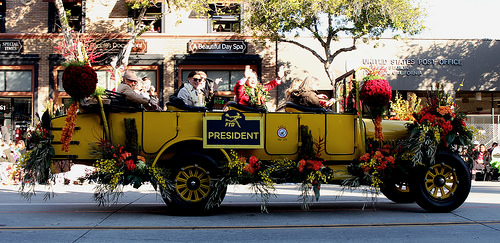

In [ ]:
# Using PIL show roses

PIL.Image.open(str(roses[0]))

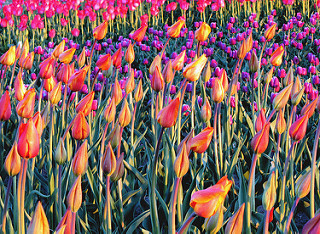

In [ ]:
# Using PIL show tulips

tulips=list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[0]))

In [ ]:
# Create dictionaries to store images and their corresponding labels
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
# acessing the perticular flower form flowers_images_dict

flowers_images_dict["roses"]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [ ]:
# Assign numerical labels to each category of flowers
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
# getting the path of perticular image
flowers_images_dict["roses"][0]

**Now we can use cv2 module to read any image file in OpenCV object(Like numpy array)**

In [ ]:
# OpenCV expect string path so default one does't work
# So we need to warp up in str to give it to OpenCV

img= cv2.imread(str(flowers_images_dict["roses"][0]))

img

array([[[ 14,   3,   0],
        [  1,   0,   2],
        [  0,   0,   6],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  0,   0,   9],
        [  0,   0,   4],
        [  4,   7,   5],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[  3,  57, 164],
        [ 30,  63, 132],
        [  0,   0,  19],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[140, 105,  85],
        [146, 112,  89],
        [147, 113,  90],
        ...,
        [155, 125,  96],
        [152, 122,  93],
        [148, 118,  89]],

       [[148, 114,  91],
        [152, 118,  95],
        [150, 116,  93],
        ...,
        [154, 124,  95],
        [152, 122,  93],
        [150, 120,  93]],

       [[153, 119,  96],
        [154, 120,  97],
        [149, 115,  91],
        ...,
        [151, 122,  95],
        [153, 123,  94],
        [151, 121,  94]]

**^ Above OpenCV read the image from disk & convert to 3D numpy array.**

In [ ]:
# Viewing 3D numpy array
img.shape

(243, 500, 3)

**In the Data, we have images with a different dimensions And to train the model we Need to all the images in Same dimensions. OpenCV Help with that.**

In [ ]:
# OpenCV resize the image

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
# Getting the keys and values from our dictionary
for flowers_name,images in flowers_images_dict.items():
    print(flowers_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
# Preparing the X and Y while Resizing the images
x,y=[],[]

for flowers_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flowers_name])
"""You can call flowers_labels_dict becoz of
Shared Keys: Both flowers_images_dict and flowers_labels_dict use the same keys
(flower category names like 'roses', 'daisy', etc.).
"""

"You can call flowers_labels_dict becoz of\nShared Keys: Both flowers_images_dict and flowers_labels_dict use the same keys\n(flower category names like 'roses', 'daisy', etc.).\n"

In [ ]:
# For further operations we need X Y in NumPy Arrays so we do Conversion to NumPy Arrays

x=np.array(x)
y=np.array(y)

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_test[0]

array([[[  2,   2,   2],
        [  1,   1,   1],
        [  3,   3,   3],
        ...,
        [  3,   3,   3],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  2,   2,   2],
        [ 22,  22,  22],
        [ 34,  34,  34],
        ...,
        [ 35,  35,  35],
        [ 21,  21,  21],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [104, 104, 104],
        [182, 181, 181],
        ...,
        [184, 183, 183],
        [103, 103, 103],
        [  2,   2,   2]],

       ...,

       [[  3,   3,   3],
        [ 55,  55,  55],
        [ 97,  97,  97],
        ...,
        [ 97,  97,  97],
        [ 55,  55,  55],
        [  2,   2,   2]],

       [[  1,   1,   1],
        [  2,   2,   2],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

**Image data is not scalled to we need to scale it by dividing by 255**

In [ ]:
# Scalling
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
# Viewing the scalled value
x_train_scaled[0]

array([[[0.69411765, 0.67058824, 0.74901961],
        [0.70196078, 0.68235294, 0.78431373],
        [0.7254902 , 0.68627451, 0.78039216],
        ...,
        [0.17647059, 0.24705882, 0.24313725],
        [0.16078431, 0.21568627, 0.20784314],
        [0.07058824, 0.29803922, 0.25098039]],

       [[0.70196078, 0.65098039, 0.76470588],
        [0.71764706, 0.66666667, 0.78823529],
        [0.72156863, 0.66666667, 0.77254902],
        ...,
        [0.12156863, 0.18431373, 0.17647059],
        [0.14117647, 0.17254902, 0.16862745],
        [0.06666667, 0.39607843, 0.3372549 ]],

       [[0.70588235, 0.63529412, 0.74901961],
        [0.73333333, 0.65882353, 0.77647059],
        [0.72941176, 0.66666667, 0.76078431],
        ...,
        [0.10980392, 0.18039216, 0.16862745],
        [0.20392157, 0.22745098, 0.21960784],
        [0.07058824, 0.50588235, 0.42745098]],

       ...,

       [[0.22352941, 0.29019608, 0.16470588],
        [0.17647059, 0.27058824, 0.14509804],
        [0.27843137, 0

In [ ]:
# Define the convolutional neural network (CNN) architecture using Keras Sequential API

# Number of classes(Flowers that we have 5)
num_classes=5

model = Sequential([
    # Making convolutional layer
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    # To pass CNN to Dense layer we need to convert it into 1D using Flatten layer
    layers.Flatten(),
    # Making Dense layer
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes)
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.fit(x_train_scaled,y_train,epochs=30)

"""setting from_logits=True means that the model's output isn't transformed
(like using softmax) before calculating the loss. Instead, it directly uses
the raw predictions from the model. This can be better for numerical stability
and efficiency during training."""

2024-05-20 03:27:03.464815: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-20 03:27:03.466036: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-20 03:27:03.466051: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-20 03:27:03.467830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-20 03:27:03.468688: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/30


2024-05-20 03:27:11.863609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 5s 43ms/step - loss: 1.6942 - accuracy: 0.3347
Epoch 2/30
86/86 [==============================] - 7s 87ms/step - loss: 1.3070 - accuracy: 0.4749
Epoch 3/30
86/86 [==============================] - 8s 97ms/step - loss: 1.1067 - accuracy: 0.5632
Epoch 4/30
86/86 [==============================] - 8s 88ms/step - loss: 0.9471 - accuracy: 0.6344
Epoch 5/30
86/86 [==============================] - 8s 94ms/step - loss: 0.8310 - accuracy: 0.6831
Epoch 6/30
86/86 [==============================] - 8s 98ms/step - loss: 0.6852 - accuracy: 0.7525
Epoch 7/30
86/86 [==============================] - 8s 93ms/step - loss: 0.9363 - accuracy: 0.7282
Epoch 8/30
86/86 [==============================] - 8s 92ms/step - loss: 0.5628 - accuracy: 0.8103
Epoch 9/30
86/86 [==============================] - 8s 90ms/step - loss: 0.3902 - accuracy: 0.8757
Epoch 10/30
86/86 [==============================] - 7s 81ms/step - loss: 1.1312 - accuracy: 0.7275
Epoch 11/30
86/86 [=

"setting from_logits=True means that the model's output isn't transformed\n(like using softmax) before calculating the loss. Instead, it directly uses\nthe raw predictions from the model. This can be better for numerical stability\nand efficiency during training."

In [ ]:
model.evaluate(x_test_scaled,y_test)

 1/29 [>.............................] - ETA: 13s - loss: 10.9307 - accuracy: 0.6250

2024-05-20 03:31:02.615571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 21ms/step - loss: 11.4844 - accuracy: 0.5643


[11.484405517578125, 0.5642701387405396]

**So our traing accuracy was good but during test data we got half accuracy**

In [ ]:
# Doing prediction using our model

predictions=model.predict(x_test_scaled)
predictions

 8/29 [=======>......................] - ETA: 0s

2024-05-20 03:31:04.713868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 13ms/step


array([[ -2.1320162 ,  35.904625  ,   3.3669305 , -48.50417   ,
         -9.761667  ],
       [ 70.308525  ,  -1.2806132 , -20.685741  ,  -7.0157933 ,
         37.902023  ],
       [ -0.80367666, -30.82557   ,  49.32279   ,   6.013334  ,
        -11.639086  ],
       ...,
       [-17.829304  ,  -0.7643969 ,  26.918407  ,  22.59834   ,
          3.7248483 ],
       [ 41.75657   ,   0.70611644, -21.808859  ,   5.124805  ,
         39.554913  ],
       [  1.3692245 ,   2.861305  ,  -1.3585858 ,  77.479225  ,
         14.104063  ]], dtype=float32)

**Above we are getting very Scattered output becoz When we build a Dense network we did't specify the output layer. So the default activation function as linear activation function**

In [ ]:
# converting the Scattered output to Probability score

score= tf.nn.softmax(predictions[1])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.0000000e+00, 8.1139191e-32, 0.0000000e+00, 2.6210503e-34,
       8.4340282e-15], dtype=float32)>

In [ ]:
np.argmax(score)

0

**^ Above** It predicted the second image as rose

**V below** in from y_test we can veryfy that it predicited correctly

In [ ]:
y_test[1]

0

**Still Our model give only 50% of accuracy so we can fix that By using Data augmentation**

In [ ]:
data_augmentation =keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9),
])

**Original Image**

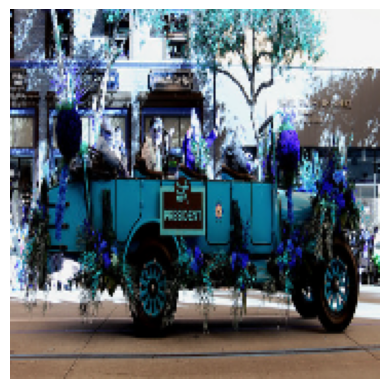

In [ ]:
plt.axis('off')
plt.imshow(x[0])

**Newly generated training sample using data augmentation**

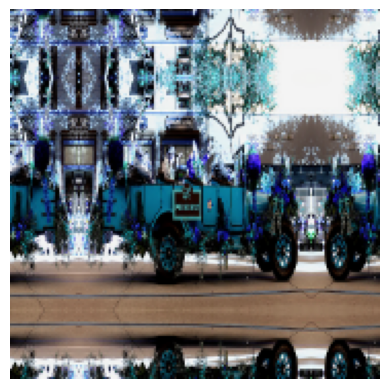

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

**From above image you can see that RandomZoom make image zoomed out**

There are diff data_augmentation like contrast, rotate etc

In [ ]:
data_augmentation =keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

#### Appling data_augmentation to our data

In [ ]:
# Define image augmentation preprocessing layers using Keras Sequential API
img_height = 180
img_width = 180
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
# Train the model using data augmentation and a drop out layer

num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compile the model with appropriate loss function, optimizer, and evaluation metric

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Train the model on the training data with data augmentation for 30 epochs

model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30


2024-05-20 03:31:32.019670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-20 03:31:32.218397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/86 [>.............................] - ETA: 6s - loss: 2.1276 - accuracy: 0.1979

2024-05-20 03:31:32.584772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:32.676827: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:32.745488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/86 [=>............................] - ETA: 5s - loss: 1.8354 - accuracy: 0.2411

2024-05-20 03:31:32.813223: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:32.883539: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:32.948565: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:33.011790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/86 [==>...........................] - ETA: 5s - loss: 1.6740 - accuracy: 0.3011

2024-05-20 03:31:33.078810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:33.145604: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:33.209333: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:33.273158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/86 [====>.........................] - ETA: 4s - loss: 1.6198 - accuracy: 0.3083

2024-05-20 03:31:33.342988: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:33.409616: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:33.475878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:33.541989: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/86 [====>.........................] - ETA: 4s - loss: 1.5864 - accuracy: 0.3180

2024-05-20 03:31:33.625849: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:33.712744: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/86 [=====>........................] - ETA: 5s - loss: 1.5726 - accuracy: 0.3229

2024-05-20 03:31:33.908957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/86 [=====>........................] - ETA: 6s - loss: 1.5517 - accuracy: 0.3328

2024-05-20 03:31:34.183200: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-20 03:31:34.370056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/86 [======>.......................] - ETA: 6s - loss: 1.5459 - accuracy: 0.3363

2024-05-20 03:31:34.483216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


KeyboardInterrupt: 

**Evaluating the model on Test data**

In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 0s 11ms/step - loss: 1.0577 - accuracy: 0.7102


[1.0577278137207031, 0.7102396488189697]

**So by doing Data augmentation we got Standard Results here**